In [33]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy import stats
from statsmodels.formula.api import ols, glm 

fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [34]:
df = pd.read_excel('C:/Users/ghdtk/BigData/Project/Data/교통사고 통계/면허취득_경과년별_교통사고.xls', header = 8)
df = df.drop('5년미만', axis=1)
df.columns = ['면허취득경과년수', '사고, 사망, 부상', 'Count']

In [35]:
df = df.drop(15).drop(16).drop(17).drop(21).drop(22).drop(23).drop(27).drop(28).drop(29).drop(33).drop(34).drop(35)

In [36]:
x = [0,1,2,3,4,5,10,15]
accident = []
death = []
injury = []
license_count = []
for i in range(int(len(df)/3)):
    accident.append(df.iloc[i*3, 2])
    death.append(df.iloc[i*3 + 1, 2])
    injury.append(df.iloc[i*3 + 2, 2])

In [37]:
df = pd.read_excel("C:/Users/ghdtk/BigData/Project/Data/기타 데이터/연도별_운전면허소지자현황.xls")

In [38]:
license_count.append(df.iloc[0]['2018'] - df.iloc[0]['2017'])
license_count.append(df.iloc[0]['2017'] - df.iloc[0]['2016'])
license_count.append(df.iloc[0]['2016'] - df.iloc[0]['2015'])
license_count.append(df.iloc[0]['2015'] - df.iloc[0]['2014'])
license_count.append(df.iloc[0]['2014'] - df.iloc[0]['2013'])
license_count.append(df.iloc[0]['2013'] - df.iloc[0]['2008'])
license_count.append(df.iloc[0]['2008'] - df.iloc[0]['2003'])
license_count.append(df.iloc[0]['2003'])

In [39]:
pd.DataFrame({'운전자수' : license_count}, index = ['0년', '1년', '2년', '3년', '4년', '5~9년', '10~14년', '15년이상'])

,운전자수
0년,495688
1년,475034
2년,896738
3년,749376
4년,696205
5~9년,3579661
10~14년,3205922
15년이상,22062457


In [40]:
accident_rate = []
death_rate = []
injury_rate = []
accident_rate = np.array(accident) / np.array(license_count)
death_rate = np.array(death) / (np.array(death) + np.array(injury))
injury_rate = np.array(injury) / (np.array(death) + np.array(injury))


In [41]:
def LeastSquareMethod(X, Y):
    x_bar = sum(X) / len(X)
    y_bar = sum(Y) / len(Y)
    
    a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y,X))])
    a /= sum([(x - x_bar) ** 2 for x in X])
    b = y_bar - a * x_bar
    print('slope : ', a, 'intercept : ', b)
    
    line_x = np.arange(min(X), max(X), 0.01)
    line_y = a * line_x + b
    
    plt.plot(line_x, line_y, 'r-')
    

In [42]:
year_accident_df = pd.DataFrame({'year' : x, 'accident_rate' : accident_rate})

m1 = ols ( 'year~accident_rate', data=year_accident_df).fit()
m1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     2.091
Date:                Sun, 06 Jun 2021   Prob (F-statistic):              0.198
Time:                        05:18:38   Log-Likelihood:                -22.609
No. Observations:                   8   AIC:                             49.22
Df Residuals:                       6   BIC:                             49.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        15.1494      7.214      2.100      0.080      -2.502      32.801
accident_rate -1354.3623    936.548     -1.446      0.198   -3646.012     937.288
==============================================================================
Omnibus:                        3.340   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                0.930
Skew:                           0.831   Prob(JB):                        0.628
Kurtosis:                       3.158   Cond. No.                         562.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

slope :  -0.00019083513233745744 intercept :  0.008448063361580133


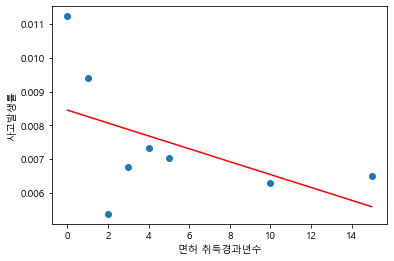

In [49]:
plt.scatter(x, accident_rate, label = 'accident rate')
plt.xlabel("면허 취득경과년수")
plt.ylabel("사고발생률")
LeastSquareMethod(x, accident_rate)

In [44]:
year_death_df = pd.DataFrame({'year' : x, 'death_rate' : death_rate})

m1 = ols ( 'year~death_rate', data=year_death_df).fit()
m1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     8.466
Date:                Sun, 06 Jun 2021   Prob (F-statistic):             0.0270
Time:                        05:18:38   Log-Likelihood:                -20.285
No. Observations:                   8   AIC:                             44.57
Df Residuals:                       6   BIC:                             44.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.5115     11.243     -2.447      0.050     -55.022      -0.001
death_rate  3854.7501   1324.795      2.910      0.027     613.094    7096.406
==============================================================================
Omnibus:                        0.274   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.157
Skew:                          -0.219   Prob(JB):                        0.925
Kurtosis:                       2.472   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

slope :  0.00015182405833307597 intercept :  0.00767501618416129


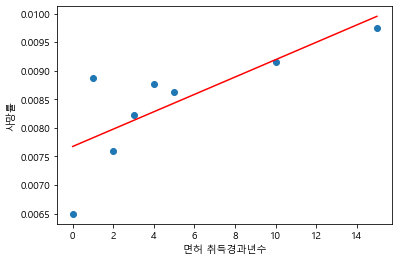

In [50]:
# plt.figure()
plt.scatter(x, death_rate, label = 'death rate')
plt.xlabel("면허 취득경과년수")
plt.ylabel("사망률")
LeastSquareMethod(x, death_rate)